In [ ]:
from zipfile import ZipFile
import os
import shutil

# Function to clean class names
def clean_class_name(class_name):

    return class_name

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/Inshira/ids_2.zip'

# Path to the extracted dir
extracted_dir = '/content/car_data'

# Extracting the contents
with ZipFile(zip_file_path, 'r') as zipObj:
    zipObj.extractall(extracted_dir)
    print("Contents extracted successfully.")

train_images_dir = '/content/train_images'

# Create directories
os.makedirs(train_images_dir, exist_ok=True)

# Process the extracted data
classes_found = set()
images_found = 0

for root, _, files in os.walk(os.path.join(extracted_dir, 'car_data', 'car_data', 'train')):
    for file in files:
        image_name = file
        class_name = os.path.basename(root)
        classes_found.add(class_name)

        class_name_cleaned = clean_class_name(class_name)

        src_path = os.path.join(root, file)
        dest_path = os.path.join(train_images_dir, class_name_cleaned, image_name)

        # Ensure the destination directory exists
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)

        # Copy the image to the destination
        shutil.copy(src_path, dest_path)

        images_found += 1

# Print  classes and images found
print(f"Classes found: {classes_found}")
print(f"Total images found: {images_found}")


Contents extracted successfully.
Classes found: {'HUMMER H2 SUT Crew Cab 2009', 'Chevrolet Malibu Sedan 2007', 'Suzuki Kizashi Sedan 2012', 'Dodge Sprinter Cargo Van 2009', 'Chevrolet Impala Sedan 2007', 'HUMMER H3T Crew Cab 2010', 'AM General Hummer SUV 2000', 'Geo Metro Convertible 1993', 'Audi TT Hatchback 2011', 'Buick Enclave SUV 2012', 'Ford Fiesta Sedan 2012', 'Dodge Caliber Wagon 2007', 'Honda Accord Sedan 2012', 'Land Rover LR2 SUV 2012', 'Ford Ranger SuperCab 2011', 'Audi R8 Coupe 2012', 'Tesla Model S Sedan 2012', 'Chevrolet Corvette ZR1 2012', 'Volkswagen Beetle Hatchback 2012', 'Bugatti Veyron 16.4 Coupe 2009', 'Chevrolet Sonic Sedan 2012', 'Jeep Patriot SUV 2012', 'Dodge Charger Sedan 2012', 'Mercedes-Benz S-Class Sedan 2012', 'Dodge Journey SUV 2012', 'Isuzu Ascender SUV 2008', 'Daewoo Nubira Wagon 2002', 'Chrysler Crossfire Convertible 2008', 'Audi RS 4 Convertible 2008', 'Infiniti QX56 SUV 2011', 'Bentley Continental GT Coupe 2007', 'FIAT 500 Convertible 2012', 'BMW 1 

<ipython-input-32-8127f66bc249>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_classes = random.sample(classes_found, min(3, len(classes_found)))


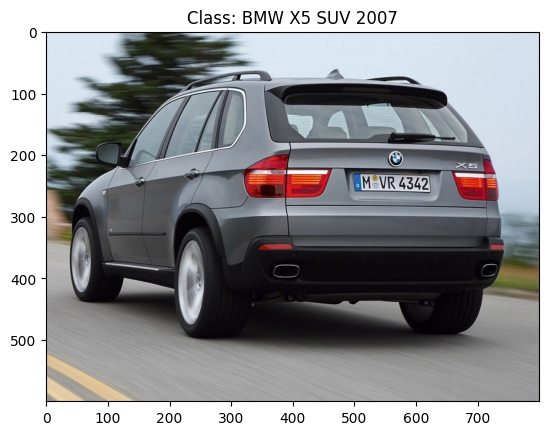

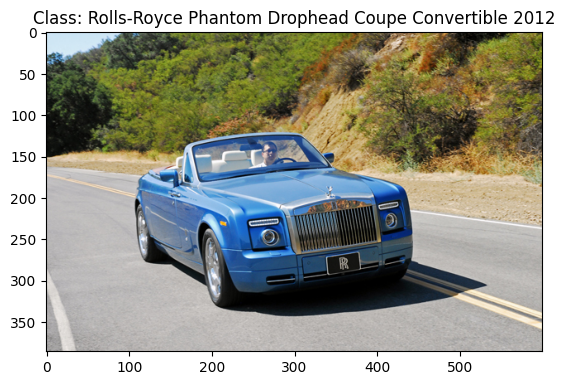

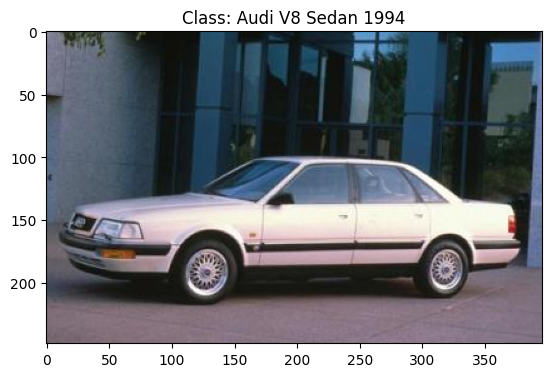

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display sample images
sample_classes = random.sample(classes_found, min(3, len(classes_found)))

for class_name in sample_classes:
    class_path = os.path.join(train_images_dir, class_name)
    image_files = os.listdir(class_path)
    sample_image_file = random.choice(image_files)
    sample_image_path = os.path.join(class_path, sample_image_file)


    img = mpimg.imread(sample_image_path)
    plt.imshow(img)
    plt.title(f"Class: {class_name}")
    plt.show()


In [ ]:

test_images_dir = os.path.join(extracted_dir, 'car_data', 'car_data', 'test')

test_images_count = sum(len(files) for _, _, files in os.walk(test_images_dir))

print(f"Total images in the test set: {test_images_count}")
train_data_dir = '/content/train_images'

Total images in the test set: 8041


# Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_dir = '/content/train_images'

#  ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(train_generator, epochs=10)


Found 8144 images belonging to 196 classes.
Epoch 1/10


KeyboardInterrupt: ignored

# Save Model

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/Inshira/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the trained model in Keras format
model.save('/content/drive/MyDrive/Inshira/trained_model.keras')


In [ ]:
# finding the req directories
all_contents = os.listdir(test_images_dir)
print("All contents in the test directory:", all_contents)

image_files = []
for subdir in all_contents:
    subdir_path = os.path.join(test_images_dir, subdir)
    if os.path.isdir(subdir_path):
        image_files.extend([os.path.join(subdir, f) for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.jpeg', '.png'))])



All contents in the test directory: ['AM General Hummer SUV 2000', 'Chevrolet Malibu Hybrid Sedan 2010', 'Hyundai Sonata Sedan 2012', 'Suzuki SX4 Hatchback 2012', 'Dodge Caravan Minivan 1997', 'Mercedes-Benz SL-Class Coupe 2009', 'Chevrolet Impala Sedan 2007', 'Spyker C8 Coupe 2009', 'Honda Accord Coupe 2012', 'BMW 1 Series Coupe 2012', 'Chevrolet Sonic Sedan 2012', 'Hyundai Accent Sedan 2012', 'Acura RL Sedan 2012', 'Ford F-150 Regular Cab 2007', 'Ford Mustang Convertible 2007', 'Daewoo Nubira Wagon 2002', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Hyundai Elantra Touring Hatchback 2012', 'Nissan NV Passenger Van 2012', 'Ferrari California Convertible 2012', 'GMC Canyon Extended Cab 2012', 'Honda Odyssey Minivan 2007', 'BMW M3 Coupe 2012', 'Chevrolet Camaro Convertible 2012', 'Lamborghini Diablo Coupe 2001', 'Ford Edge SUV 2012', 'Audi S4 Sedan 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Dodge Caliber Wagon 2012', 'Aston Martin Virage Convertible 2012', 'BMW Z4 Convertible 2012

In [ ]:
pip install joblib

In [ ]:
import joblib
joblib.dump(clf, 'Car_detect.joblib')

NameError: ignored

# Make Predictions

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Path to  trained model
model_path = '/content/drive/MyDrive/Inshira/trained_model.h5'

# Load  model
model = load_model(model_path)

# Path specified
test_images_dir = '/content/car_data/car_data/car_data/test'

# List all image files in the test directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Print the list of image files
print("List of image files:", image_files)

# # Check if there are no image files
# if not image_files:
#     print("No image files found in the test directory. Check the path and file extensions.")
# else:
#     # Select  random image
#     random_image_file = random.choice(image_files)
#     random_image_path = os.path.join(test_images_dir, random_image_file)

#     # display the selected image
#     img = image.load_img(random_image_path, target_size=(224, 224))
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()

#     # Preprocess the image
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = preprocess_input(img_array)

#     # Make a prediction
#     predictions = model.predict(img_array)

#     # Get the predicted class
#     predicted_class_index = np.argmax(predictions)
#     predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

#     print(f"Predicted class: {predicted_class}")


List of image files: []
No image files found in the test directory. Check the path and file extensions.


In [ ]:
# Print the contents of the  directory
print("Contents of the test_data directory:", os.listdir('/content/car_data'))


Contents of the test_data directory: ['car_data', 'names.csv', 'anno_train.csv', 'anno_test.csv']


In [ ]:
# Path to the directory containing  images
test_images_dir = '/content/car_data/car_data/car_data/test'

# Print the contents of the car_data/test directory
print("Contents of the test images directory:", os.listdir(test_images_dir))


Contents of the test images directory: ['AM General Hummer SUV 2000', 'Chevrolet Malibu Hybrid Sedan 2010', 'Hyundai Sonata Sedan 2012', 'Suzuki SX4 Hatchback 2012', 'Dodge Caravan Minivan 1997', 'Mercedes-Benz SL-Class Coupe 2009', 'Chevrolet Impala Sedan 2007', 'Spyker C8 Coupe 2009', 'Honda Accord Coupe 2012', 'BMW 1 Series Coupe 2012', 'Chevrolet Sonic Sedan 2012', 'Hyundai Accent Sedan 2012', 'Acura RL Sedan 2012', 'Ford F-150 Regular Cab 2007', 'Ford Mustang Convertible 2007', 'Daewoo Nubira Wagon 2002', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Hyundai Elantra Touring Hatchback 2012', 'Nissan NV Passenger Van 2012', 'Ferrari California Convertible 2012', 'GMC Canyon Extended Cab 2012', 'Honda Odyssey Minivan 2007', 'BMW M3 Coupe 2012', 'Chevrolet Camaro Convertible 2012', 'Lamborghini Diablo Coupe 2001', 'Ford Edge SUV 2012', 'Audi S4 Sedan 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Dodge Caliber Wagon 2012', 'Aston Martin Virage Convertible 2012', 'BMW Z4 Convertible 2

In [ ]:
# List all image files in the test directory
image_files = []
for root, dirs, files in os.walk(test_images_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, file))

# Print the list of image files
print("List of image files:", image_files)


List of image files: ['/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/01802.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/03585.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/07917.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/05888.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/04117.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/01887.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/01226.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/01946.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/01117.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/03094.jpg', '/content/car_data/car_data/car_data/test/AM General Hummer SUV 2000/01167.jpg', '/cont

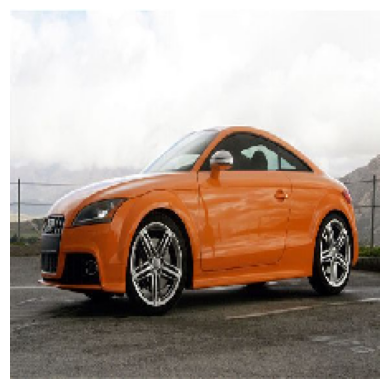

1/1 [==============================] - 0s 17ms/step
Predicted class: AM General Hummer SUV 2000
Prediction is incorrect.


In [ ]:
# Select a random image
random_image_path = random.choice(image_files)

# Load and display the selected image
img = image.load_img(random_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class = os.path.basename(os.path.dirname(image_files[predicted_class_index]))

print(f"Predicted class: {predicted_class}")

# Check if the prediction is correct
if predicted_class in random_image_path:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")


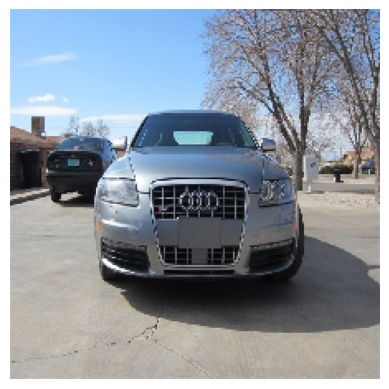

1/1 [==============================] - 0s 19ms/step
Predicted class: AM General Hummer SUV 2000
Prediction is incorrect.


In [ ]:
random_image_path = random.choice(image_files)

img = image.load_img(random_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()


img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


predictions = model.predict(img_array)


predicted_class_index = np.argmax(predictions)
predicted_class = os.path.basename(os.path.dirname(image_files[predicted_class_index]))

print(f"Predicted class: {predicted_class}")


if predicted_class in random_image_path:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")


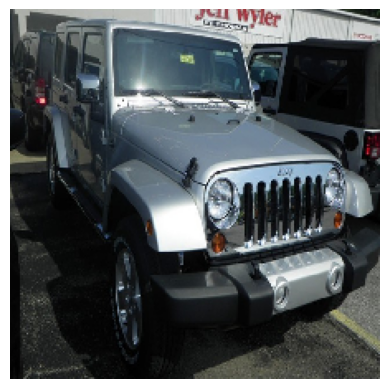

1/1 [==============================] - 0s 36ms/step
Predicted class: Jeep Wrangler SUV 2012
Prediction is correct!


In [ ]:

random_image_path = random.choice(image_files)


img = image.load_img(random_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()


img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


predictions = model.predict(img_array)


predicted_class = os.path.basename(os.path.dirname(random_image_path))

print(f"Predicted class: {predicted_class}")

if predicted_class in random_image_path:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")



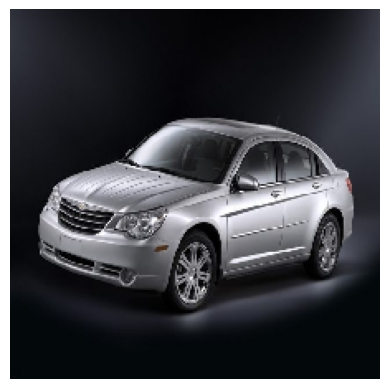

1/1 [==============================] - 0s 18ms/step
Predicted class: Chrysler Sebring Convertible 2010
Prediction is correct!


In [ ]:

random_image_path = random.choice(image_files)


img = image.load_img(random_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)


predicted_class = os.path.basename(os.path.dirname(random_image_path))

print(f"Predicted class: {predicted_class}")

if predicted_class in random_image_path:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")



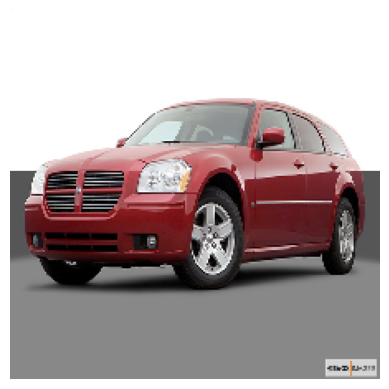

1/1 [==============================] - 0s 28ms/step
Predicted class: Dodge Magnum Wagon 2008
Prediction is correct!


In [ ]:
random_image_path = random.choice(image_files)


img = image.load_img(random_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()


img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


predictions = model.predict(img_array)


predicted_class = os.path.basename(os.path.dirname(random_image_path))

print(f"Predicted class: {predicted_class}")


if predicted_class in random_image_path:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")



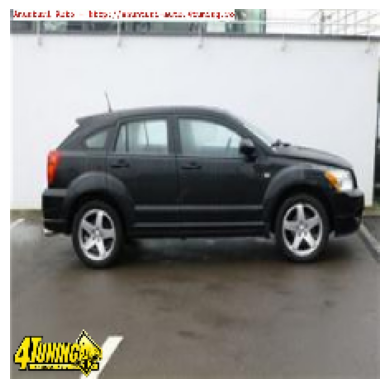

1/1 [==============================] - 0s 18ms/step
Predicted class: Dodge Caliber Wagon 2012
Prediction is correct!


In [ ]:

random_image_path = random.choice(image_files)


img = image.load_img(random_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


predictions = model.predict(img_array)


predicted_class = os.path.basename(os.path.dirname(random_image_path))

print(f"Predicted class: {predicted_class}")


if predicted_class in random_image_path:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")



# Front-End

In [ ]:
!pip install flask-ngrok
!pip install flask


In [ ]:
import os
import random
from flask import Flask, render_template
from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when the app is run

# Path to the trained model
model_path = '/content/drive/MyDrive/Inshira/trained_model.h5'

# Path to the test images directory
test_images_dir = '/content/test_data/car_data/car_data/test'

# Load the trained model
model = load_model(model_path)

In [ ]:
html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Prediction</title>
</head>
<body>
    <h1>Random Image Prediction</h1>
    <img src="{{ prediction_result.image_path }}" alt="Random Image">
    <p>Predicted Class: {{ prediction_result.predicted_class }}</p>
    <p>{{ "Prediction is correct!" if prediction_result.is_correct else "Prediction is incorrect." }}</p>
</body>
</html>
"""

# Specify the file path where you want to save the HTML file
html_file_path = '/content/index.html'

# Write the HTML code to the file
with open(html_file_path, 'w') as html_file:
    html_file.write(html_code)

# Print a message indicating the file has been written
print(f'HTML file written to: {html_file_path}')


HTML file written to: /content/index.html


In [ ]:
import os
import random
from flask import Flask, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

app = Flask(__name__)

# Load the trained model
model_path = '/content/drive/MyDrive/Inshira/trained_model.h5'
model = load_model(model_path)

# Path to the directory containing test images
test_images_dir = '/content/car_data/car_data/car_data/test'

# List all image files in the test directory
image_files = [os.path.join(test_images_dir, folder, file)
               for folder in os.listdir(test_images_dir)
               for file in os.listdir(os.path.join(test_images_dir, folder))]

@app.route('/')
def index():
    # Select a random image from the list
    random_image_path = random.choice(image_files)

    # Load and display the selected image
    img = image.load_img(random_image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values

    # Make a prediction using the trained model
    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class = os.path.basename(os.path.dirname(random_image_path))

    # Check if the prediction is correct
    is_correct = predicted_class in random_image_path

    return render_template('index.html',
                           prediction_result={'image_path': random_image_path,
                                              'predicted_class': predicted_class,
                                              'is_correct': is_correct})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
